In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

Matplotlib created a temporary cache directory at /tmp/matplotlib-r9hqt5xs because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv("/data/BankChurn.csv")
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Addressing the outliers

In [3]:
columns=['CreditScore','Balance','EstimatedSalary','Age','NumOfProducts']
for col in columns:
    df[col]=winsorize(df[col],limits=[0.05,0.1],inclusive=(True,True))

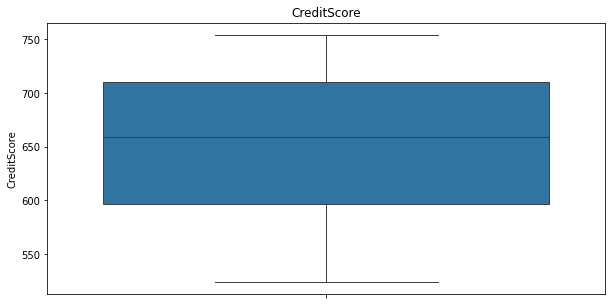

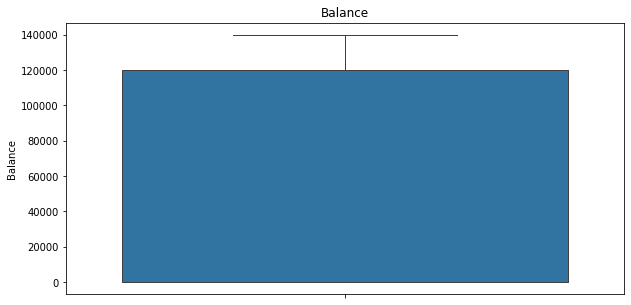

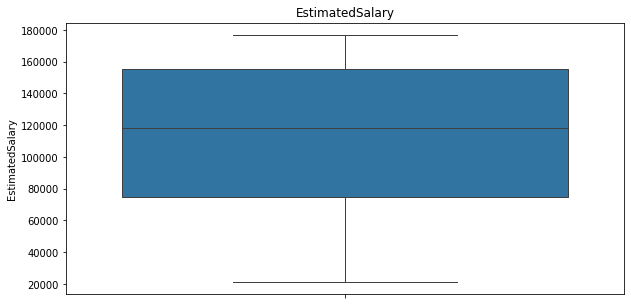

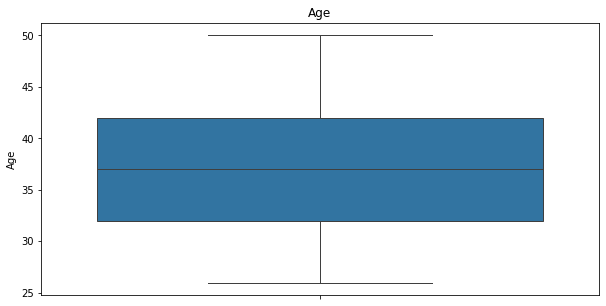

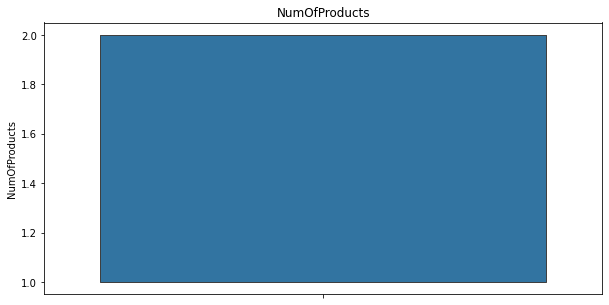

In [4]:
for i in columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [5]:
df.drop(['CustomerId', 'Surname', 'id'], axis=1, inplace=True)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,176843.53,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,176843.53,0
3,581,France,Male,34.0,2,139959.05,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,21198.39,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,754,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,139959.05,1,0.0,1.0,71173.03,0


In [7]:
X = df.drop("Exited", axis=1) # independent variables
y = df["Exited"] # dependent variable

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.6+ MB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
categorical_columns = ['Geography', 'Gender']
numerical_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Tenure']
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5,min_samples_leaf=5,min_samples_split=5,criterion='gini'))  # You can specify any parameters for RandomForestClassifier here
])

In [11]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('num', 'passthrough',
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary', 'Age',
                                                   'NumOfProducts',
                                                   'IsActiveMember',
                                                   'HasCrCard', 'Tenure'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=5,
                                        random_state=42))])

In [12]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.840124822007453
Confusion Matrix:
 [[25486   566]
 [ 4711  2244]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     26052
           1       0.80      0.32      0.46      6955

    accuracy                           0.84     33007
   macro avg       0.82      0.65      0.68     33007
weighted avg       0.83      0.84      0.81     33007



In [14]:
from refractml import *
from refractml.constants import MLModelFlavours
import requests

@scoring_func
def score(model, request):
    import json
    payload = request.json["payload"]
    if isinstance(request.json["payload"],str):
        payload_data = eval(payload)
        if isinstance(payload_data['Geography'], str):
            data_json = eval(payload)
            data = pd.DataFrame([data_json])
            prediction = pd.DataFrame(model.predict(data))
            return prediction[0].to_list()[0]
        elif isinstance(payload_data['Geography'], dict):
            data = pd.DataFrame(eval(payload))
            prediction = pd.DataFrame(model.predict(data))
            return prediction[0].tolist()
        elif isinstance(payload_data['Geography'], list):
            data = pd.DataFrame(payload_data)
            prediction = model.predict(data)
            return prediction.tolist()
    return "This method is not allowed"

/tmp/pip_packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [28]:
payload = str(X_test.iloc[158].to_dict())
req = requests.Request()
req.json= {'payload': payload}
print({'payload': payload})
print(score(pipeline, req))

{'payload': "{'CreditScore': 643, 'Geography': 'France', 'Gender': 'Female', 'Age': 38.0, 'Tenure': 6, 'Balance': 135289.33, 'NumOfProducts': 1, 'HasCrCard': 1.0, 'IsActiveMember': 1.0, 'EstimatedSalary': 152992.04, 'Exited_pred': 0, 'Exited': 0}"}
0


In [21]:
register_model(pipeline, 
               score, 
               name="Bank_churn", 
               description="bank churn",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               input_type="json", 
               explain_ai=True,
               prob=y_pred,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               kyd=True,
               kyd_score = True)

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [22]:
joblib.dump(pipeline, "pipeline_randomforest.joblib")

['pipeline_randomforest.joblib']

In [23]:
X_train['Exited_pred'] = pipeline.predict(X_train)
X_train['Exited'] = y_train

X_test['Exited_pred'] = pipeline.predict(X_test)
X_test['Exited'] = y_test

X_train.to_csv("/data/training_data.csv", index=False)

X_test.to_csv("/data/testing_data.csv", index=False)

In [24]:
payload

"{'CreditScore': 611, 'Geography': 'Germany', 'Gender': 'Male', 'Age': 39.0, 'Tenure': 9, 'Balance': 109724.38, 'NumOfProducts': 2, 'HasCrCard': 1.0, 'IsActiveMember': 0.0, 'EstimatedSalary': 149458.81}"